<a href="https://colab.research.google.com/github/divyablessingrose/DBR/blob/main/Copy_of_Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
data = [[10], [12], [11], [13], [12], [11], [14], [15], [100], [110]]  # 100 and 110 are outliers
df = pd.DataFrame(data, columns=["Value"])
model = IsolationForest(contamination=0.2, random_state=42)
model.fit(df)
df["Anomaly"] = model.predict(df)
df["Anomaly_Label"] = df["Anomaly"].map({1: "Normal", -1: "Anomaly"})
print(df)

   Value  Anomaly Anomaly_Label
0     10        1        Normal
1     12        1        Normal
2     11        1        Normal
3     13        1        Normal
4     12        1        Normal
5     11        1        Normal
6     14        1        Normal
7     15        1        Normal
8    100       -1       Anomaly
9    110       -1       Anomaly


In [ ]:
import pandas as pd

from mlxtend.preprocessing import TransactionEncoder

transactions = [

 ['Milk', 'Bread', 'Butter'],

 ['Milk', 'Diaper', 'Beer'],

 ['Bread', 'Butter'],

 ['Milk', 'Bread', 'Butter', 'Eggs']

]

te = TransactionEncoder()

te_array = te.fit(transactions).transform(transactions)

df = pd.DataFrame(te_array, columns=te.columns_)


from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

      antecedents     consequents  support  confidence      lift
0         (Bread)        (Butter)     0.75    1.000000  1.333333
1        (Butter)         (Bread)     0.75    1.000000  1.333333
2   (Bread, Milk)        (Butter)     0.50    1.000000  1.333333
3  (Butter, Milk)         (Bread)     0.50    1.000000  1.333333
4         (Bread)  (Butter, Milk)     0.50    0.666667  1.333333
5        (Butter)   (Bread, Milk)     0.50    0.666667  1.333333


In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
transactions = [
    ['Milk', 'Bread', 'Butter'],
    ['Milk', 'Diaper', 'Beer'],
    ['Bread', 'Butter'],
    ['Milk', 'Bread', 'Butter', 'Eggs']
]
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_array, columns=te.columns_)
from mlxtend.frequent_patterns import fpgrowth
frequent_itemsets_fp = fpgrowth(df, min_support=0.5, use_colnames=True)
rules_fp = association_rules(frequent_itemsets_fp, metric="lift", min_threshold=1)
print(rules_fp[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

      antecedents     consequents  support  confidence      lift
0         (Bread)        (Butter)     0.75    1.000000  1.333333
1        (Butter)         (Bread)     0.75    1.000000  1.333333
2   (Bread, Milk)        (Butter)     0.50    1.000000  1.333333
3  (Butter, Milk)         (Bread)     0.50    1.000000  1.333333
4         (Bread)  (Butter, Milk)     0.50    0.666667  1.333333
5        (Butter)   (Bread, Milk)     0.50    0.666667  1.333333


In [ ]:
# Instead of "import Libraries", import the actual library you need.
# For example, if you need Pandas and NumPy:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
model = models.Sequential([
    		layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
 	   	layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation='relu'),
   		 layers.MaxPooling2D((2, 2)),
layers.Flatten(),
   		 layers.Dense(64, activation='relu'),
  		  layers.Dense(10, activation='softmax')  # 10 output classes
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc:.2f}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.8726 - loss: 0.4199 - val_accuracy: 0.9830 - val_loss: 0.0597
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 39s 47ms/step - accuracy: 0.9811 - loss: 0.0593 - val_accuracy: 0.9870 - val_loss: 0.0502
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.9869 - loss: 0.0406 - val_accuracy: 0.9875 - val_loss: 0.0384
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 39s 46ms/step - accuracy: 0.9914 - loss: 0.0268 - val_accuracy: 0.9900 - val_loss: 0.0357
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 39s 46ms/step - accuracy: 0.9934 - loss: 0.0218 - val_accuracy: 0.9903 - val_loss: 0.0359
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9892 - loss: 0.0338
Test Accuracy: 0.99


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
linear_model = models.Sequential([
   	 layers.Dense(1, input_shape=(10,))
])
linear_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11 (44.00 B)

 Trainable params: 11 (44.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
logistic_model = models.Sequential([
    	layers.Dense(1, activation='sigmoid', input_shape=(10,))
])
logistic_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11 (44.00 B)

 Trainable params: 11 (44.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf
from tensorflow import keras
# Define Autoencoder Model
input_dim = X.shape[1]
encoding_dim = 32  # Reduced dimension
# Encoder
input_layer = keras.layers.Input(shape=(input_dim,))
encoded = keras.layers.Dense(encoding_dim, activation='relu')(input_layer)
# Decoder
decoded = keras.layers.Dense(input_dim, activation='sigmoid')(encoded)

# Compile Autoencoder
autoencoder = keras.models.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
# Train Autoencoder
autoencoder.fit(X, X, epochs=20, batch_size=256, shuffle=True, verbose=1)
# Get encoded representation
encoder = keras.models.Model(input_layer, encoded)
X_autoencoded = encoder.predict(X)
# Scatter plot of Autoencoder results (first 2 dimensions)
plt.scatter(X_autoencoded[:, 0], X_autoencoded[:, 1], c=y, cmap='plasma', alpha=0.7)
plt.colorbar(label="Digit Label")
plt.title("Autoencoder Representation of Digits")
plt.show()

NameError: name 'X' is not defined

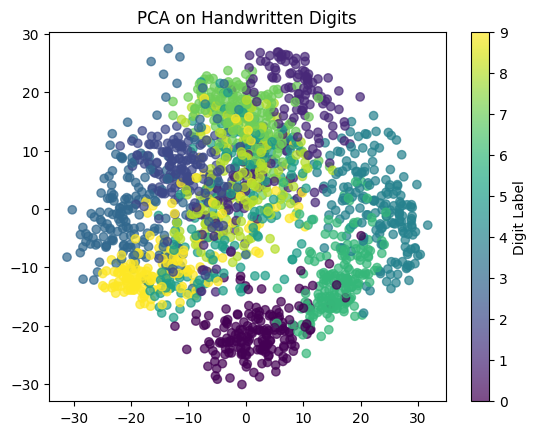

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
# Load dataset (Handwritten digits)
digits = load_digits()
X = digits.data
y = digits.target
# Apply PCA (Reduce to 2 dimensions)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
# Scatter plot of PCA results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(label="Digit Label")
plt.title("PCA on Handwritten Digits")
plt.show()

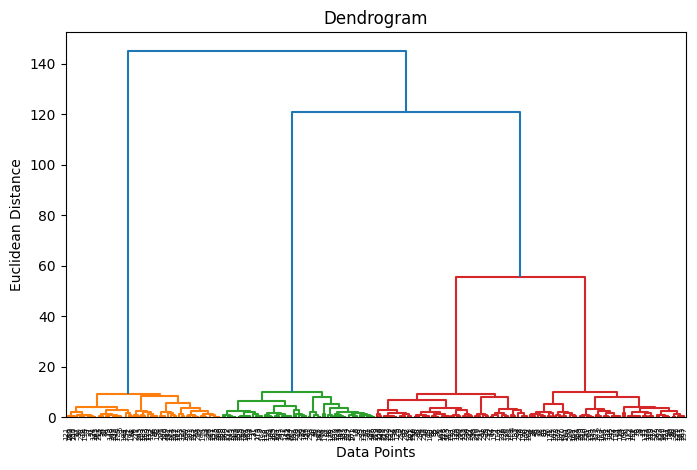

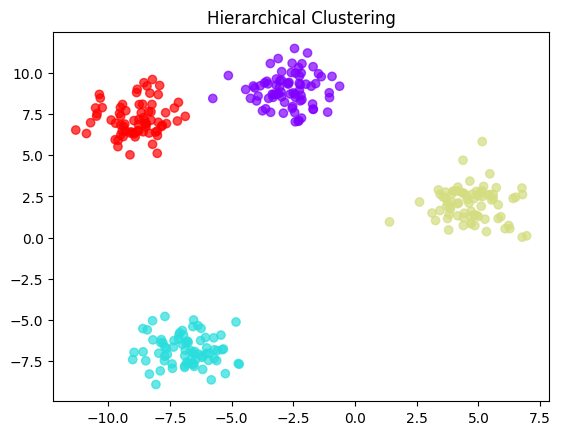

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, random_state=42)
# Plot the dendrogram
plt.figure(figsize=(8, 5))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()
# Apply Agglomerative Clustering
# Use 'metric' instead of 'affinity' and specify linkage as 'ward'
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)
# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=y_hc, cmap='rainbow', alpha=0.7)
plt.title("Hierarchical Clustering")
plt.show()

In [ ]:
# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', alpha=0.7)
# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='red', marker='X', label="Centroids")
plt.legend()
plt.title("K-Means Clustering")
plt.show()

NameError: name 'y_kmeans' is not defined

In [ ]:
# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', alpha=0.7)
# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='red', marker='X', label="Centroids")
plt.legend()
plt.title("K-Means Clustering")
plt.show()

NameError: name 'y_kmeans' is not defined

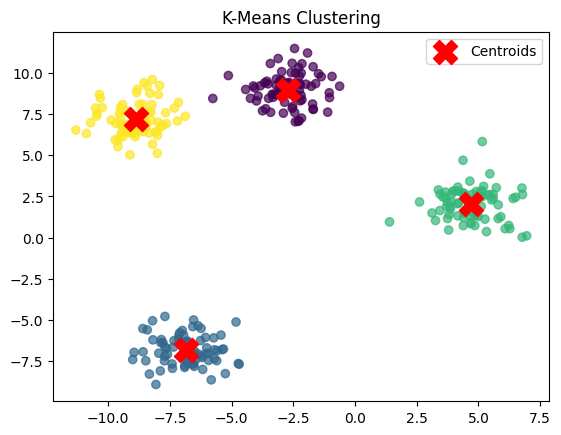

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
  # Generate synthetic data (300 samples, 4 clusters)
X, y = make_blobs(n_samples=300, centers=4, random_state=42)
# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)
 # Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', alpha=0.7)
# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='red', marker='X', label="Centroids")
plt.legend()
plt.title("K-Means Clustering")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Load dataset (e.g., Boston Housing Prices)
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# Select Features and Target
X = df[['MedInc', 'HouseAge', 'AveRooms']] # Selecting some features
y = df['Price']
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

In [ ]:
!pip install ydata-profiling
import pandas as pd
from ydata_profiling import ProfileReport # Correct import
# Load sample dataset
df =
pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.
csv")
# Generate profile report
profile = ProfileReport(df, explorative=True)
# Display report in Colab
profile.to_notebook_iframe()
import pandas as pd
from ydata_profiling import ProfileReport # Correct import
# Load sample dataset
df =
pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.
csv")
# Generate profile report
profile = ProfileReport(df, explorative=True)
# Display report in Colab
profile.to_notebook_iframe()
profile.to_file("titanic_report.html")

SyntaxError: unterminated string literal (detected at line 6) (<ipython-input-25-5e9b2061d62e>, line 6)

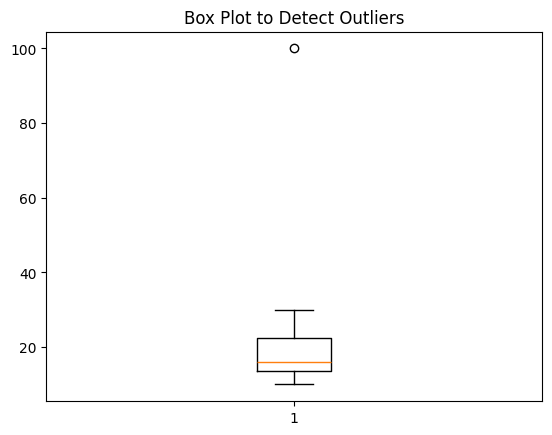

Outliers:
    values
7     100


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Sample data
data = [10, 12, 14, 15, 17, 20, 30, 100] # 100 is an outlier
# Convert to DataFrame
df = pd.DataFrame(data, columns=['values'])
# Calculate Q1, Q3, and IQR
Q1 = df['values'].quantile(0.25)
Q3 = df['values'].quantile(0.75)
IQR = Q3 - Q1
# Define outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['values'] < lower_bound) | (df['values'] > upper_bound)]
# Plot Boxplot
plt.boxplot(df['values'])
plt.title("Box Plot to Detect Outliers")
plt.show()
# Print outliers
print("Outliers:\n", outliers)

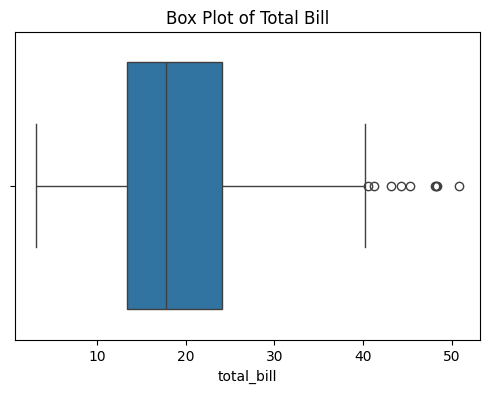

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt # Import the matplotlib library

tips = sns.load_dataset('tips')
plt.figure(figsize=(6, 4))
sns.boxplot(x=tips['total_bill'])
plt.title("Box Plot of Total Bill")
plt.show()